# GPGN409 homework 
your name: Benjamin Nguyen

In [2]:
# Import packages

using DataFrames, CSV
using LinearAlgebra
using Printf
using CairoMakie
using GLMakie
using StatsBase
using GeometryBasics

In [3]:
# Load data

# Log A
df = CSV.read("bhA.csv", DataFrame; delim=',', ignorerepeated=true);
vpA = df[:, 1] ./1000
vsA = df[:, 2] ./1000
rhoA = df[:, 3];
nA = length(vpA)

# Log B
df = CSV.read("bhB.csv", DataFrame; delim=',', ignorerepeated=true);
vpB = df[:, 1] ./1000
vsB = df[:, 2] ./1000
rhoB = df[:, 3];
nB = length(vpB);

In [4]:
# Define the 2D histogram function with keyword arguments
function hist_2d(; x_data::Vector{T}, y_data::Vector{T}, 
                x_num_bins::Int, y_num_bins::Int, 
                first_value_x::Float64, end_value_x::Float64,
                first_value_y::Float64, end_value_y::Float64) where T
        
    # Create new arrays with the added values at the beginning and end
    x_data_extended = [first_value_x; x_data; end_value_x]
    y_data_extended = [first_value_y; y_data; end_value_y]

    # Find the minimum and maximum values for both x and y data
    x_min, x_max = minimum(x_data_extended), maximum(x_data_extended)
    y_min, y_max = minimum(y_data_extended), maximum(y_data_extended)

    # Calculate the bin width for x and y
    x_bin_width = (x_max - x_min) / x_num_bins
    y_bin_width = (y_max - y_min) / y_num_bins

    # Generate the bin edges for both x and y
    x_bin_edges = range(x_min, stop=x_max, length=x_num_bins+1)
    y_bin_edges = range(y_min, stop=y_max, length=y_num_bins+1)

    # Initialize the bins count (2D array)
    bin_counts = zeros(Int, x_num_bins, y_num_bins)

    # Count how many data points fall into each 2D bin
    for (x_val, y_val) in zip(x_data_extended, y_data_extended)
        x_bin_idx = clamp(floor(Int, (x_val - x_min) / x_bin_width) + 1, 1, x_num_bins)
        y_bin_idx = clamp(floor(Int, (y_val - y_min) / y_bin_width) + 1, 1, y_num_bins)
        bin_counts[x_bin_idx, y_bin_idx] += 1
    end
    bin_counts[1,1] = 0
    bin_counts[end, end] = 0

    return x_bin_edges, y_bin_edges, bin_counts./sum(bin_counts)
end

# Define the 3D histogram function with keyword arguments
function hist_3d(; x_data::Vector{T}, y_data::Vector{T}, z_data::Vector{T},
                x_num_bins::Int, y_num_bins::Int, z_num_bins::Int, 
                first_value_x::Float64, end_value_x::Float64,
                first_value_y::Float64, end_value_y::Float64,
                first_value_z::Float64, end_value_z::Float64) where T

    # Create new arrays with the added values at the beginning and end
    x_data_extended = [first_value_x; x_data; end_value_x]
    y_data_extended = [first_value_y; y_data; end_value_y]
    z_data_extended = [first_value_z; z_data; end_value_z]

    # Find the minimum and maximum values for x, y, and z data
    x_min, x_max = minimum(x_data_extended), maximum(x_data_extended)
    y_min, y_max = minimum(y_data_extended), maximum(y_data_extended)
    z_min, z_max = minimum(z_data_extended), maximum(z_data_extended)

    # Calculate the bin width for x, y, and z
    x_bin_width = (x_max - x_min) / x_num_bins
    y_bin_width = (y_max - y_min) / y_num_bins
    z_bin_width = (z_max - z_min) / z_num_bins

    # Generate the bin edges for x, y, and z
    x_bin_edges = range(x_min, stop=x_max, length=x_num_bins+1)
    y_bin_edges = range(y_min, stop=y_max, length=y_num_bins+1)
    z_bin_edges = range(z_min, stop=z_max, length=z_num_bins+1)

    # Initialize the bins count (3D array)
    bin_counts = zeros(Int, x_num_bins, y_num_bins, z_num_bins)

    # Count how many data points fall into each 3D bin
    for (x_val, y_val, z_val) in zip(x_data_extended, y_data_extended, z_data_extended)
        x_bin_idx = clamp(floor(Int, (x_val - x_min) / x_bin_width) + 1, 1, x_num_bins)
        y_bin_idx = clamp(floor(Int, (y_val - y_min) / y_bin_width) + 1, 1, y_num_bins)
        z_bin_idx = clamp(floor(Int, (z_val - z_min) / z_bin_width) + 1, 1, z_num_bins)
        bin_counts[x_bin_idx, y_bin_idx, z_bin_idx] += 1
    end

    # Optionally, normalize bin counts (e.g., divide by the total sum)
    norm_bin_counts = bin_counts ./ sum(bin_counts)

    return x_bin_edges, y_bin_edges, z_bin_edges, norm_bin_counts
end

hist_3d (generic function with 1 method)

In [5]:
# Call the function with keyword arguments

# for vp and vs relation
vpvs_x_bin_edges, vpvs_y_bin_edges, vpvs_bin_counts = hist_2d(x_data=vpB, y_data=vsB,
                                                              x_num_bins=100, y_num_bins=100,
                                                              first_value_x=1.0, end_value_x=5.0,
                                                              first_value_y=1.0, end_value_y=5.0)
# for vp and rho relation
vprho_x_bin_edges, vprho_y_bin_edges, vprho_bin_counts = hist_2d(x_data=vpB, y_data=rhoB, 
                                                              x_num_bins=100, y_num_bins=50,
                                                              first_value_x=1.0, end_value_x=5.0,
                                                              first_value_y=2.0, end_value_y=3.0)
# for vs and rho relation
vsrho_x_bin_edges, vsrho_y_bin_edges, vsrho_bin_counts = hist_2d(x_data=vsB, y_data=rhoB, 
                                                              x_num_bins=100, y_num_bins=50,
                                                              first_value_x=1.0, end_value_x=5.0,
                                                              first_value_y=2.0, end_value_y=3.0);

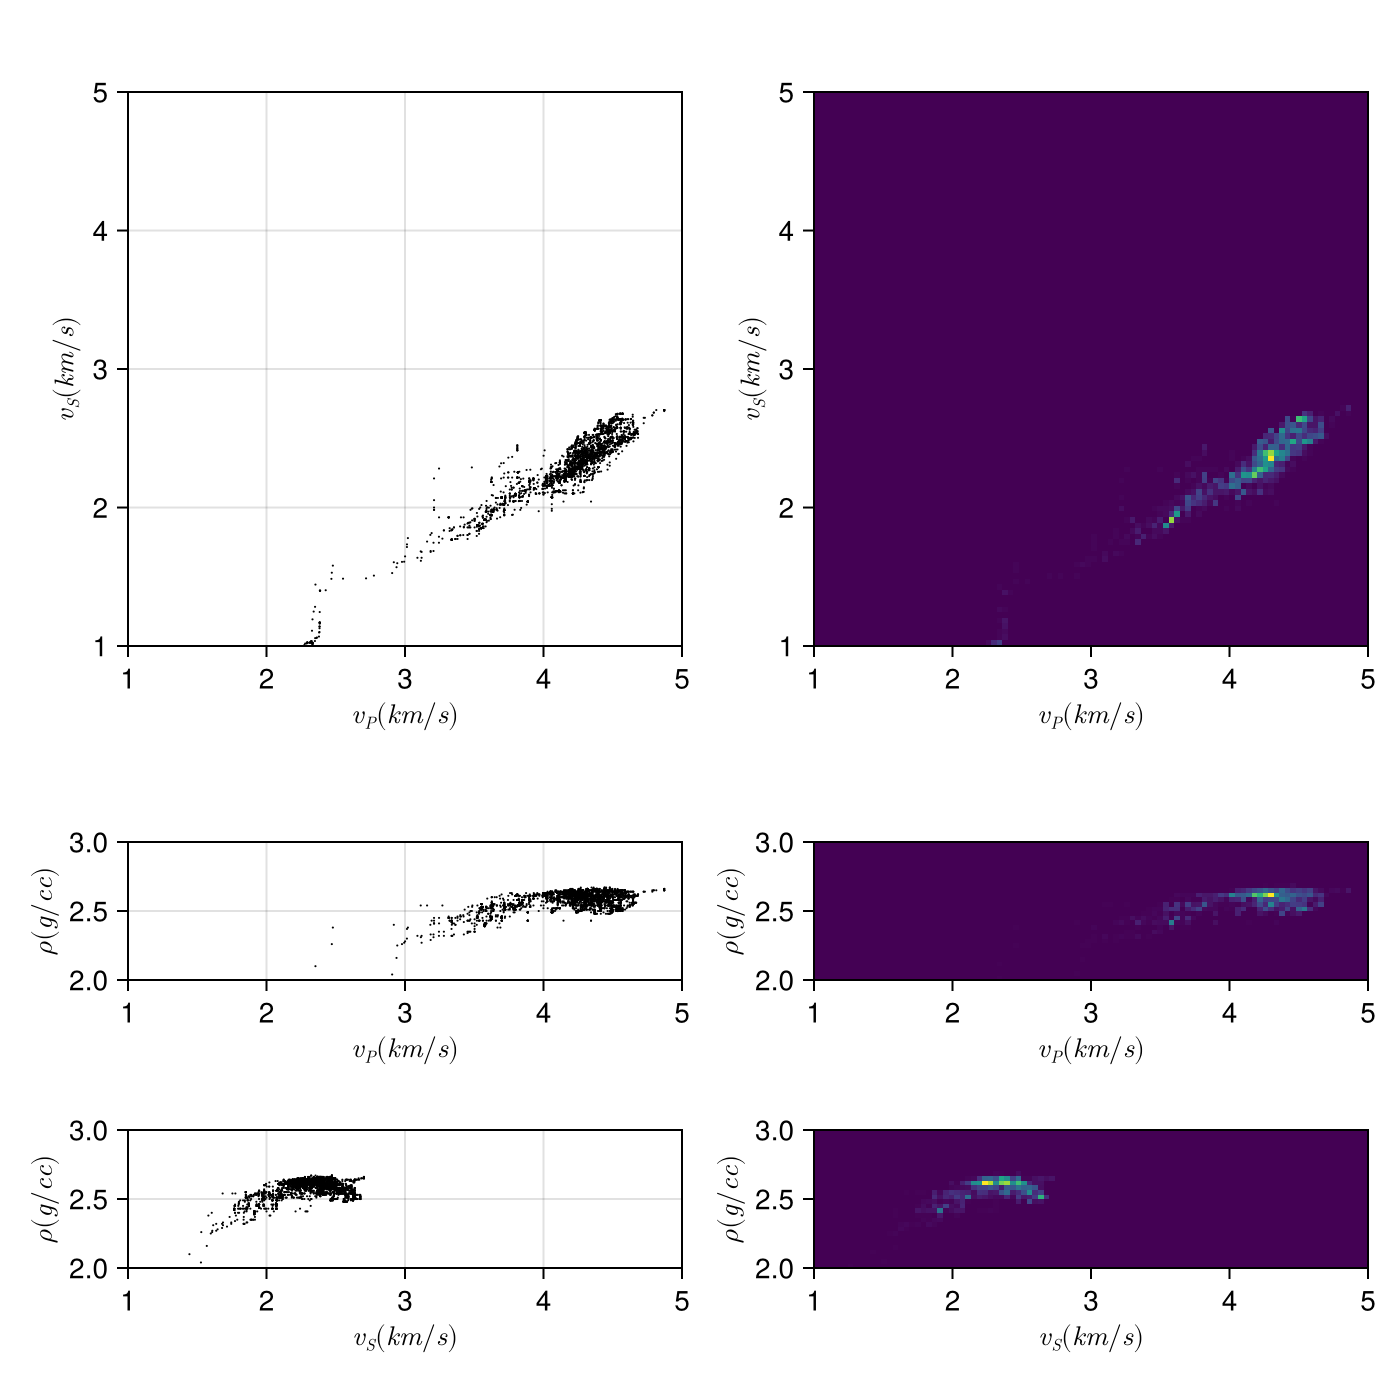

In [6]:
CairoMakie.activate!() # Activate the backend just for plotting

f = Figure(size=(700, 700))

# Axis and Labels
ax1 = Axis(f[1, 1], xlabel=L"v_P (km/s)", ylabel=L"v_S (km/s)", aspect = DataAspect(), limits = (1, 5, 1, 5))
ax2 = Axis(f[2, 1], xlabel=L"v_P (km/s)", ylabel=L"\rho (g/cc)", aspect = DataAspect(), limits = (1, 5, 2, 3))
ax3 = Axis(f[3, 1], xlabel=L"v_S (km/s)", ylabel=L"\rho (g/cc)", aspect = DataAspect(), limits = (1, 5, 2, 3))

ax4 = Axis(f[1, 2], xlabel=L"v_P (km/s)", ylabel=L"v_S (km/s)", aspect = DataAspect(), limits = (1, 5, 1, 5))
ax5 = Axis(f[2, 2], xlabel=L"v_P (km/s)", ylabel=L"\rho (g/cc)", aspect = DataAspect(), limits = (1, 5, 2, 3))
ax6 = Axis(f[3, 2], xlabel=L"v_S (km/s)", ylabel=L"\rho (g/cc)", aspect = DataAspect(), limits = (1, 5, 2, 3))

# Plots
scatter!(ax1, vpB, vsB, markersize=1.5, color=:black)
scatter!(ax2, vpB, rhoB, markersize=1.5, color=:black)
scatter!(ax3, vsB, rhoB, markersize=1.5, color=:black)
heatmap!(ax4, vpvs_x_bin_edges, vpvs_y_bin_edges, vpvs_bin_counts)
heatmap!(ax5, vprho_x_bin_edges, vprho_y_bin_edges, vprho_bin_counts)
heatmap!(ax6, vsrho_x_bin_edges, vsrho_y_bin_edges, vsrho_bin_counts)
rowsize!(f.layout, 1, Relative(2/3)); f

In [7]:
# Call the function with keyword arguments
# 3D histogram
x_edges, y_edges, z_edges, counts = hist_3d(x_data=vpB, y_data=vsB, z_data=rhoB,
                                            x_num_bins=100, y_num_bins=100, z_num_bins=50,
                                            first_value_x=1.0, end_value_x=5.0,
                                            first_value_y=1.0, end_value_y=5.0,
                                            first_value_z=2.0, end_value_z=3.0);

┌ Warning: Encountered an `AbstractVector` with value 1.0:0.04:5.0 on side x in `convert_arguments` for the `ImageLike` trait.
│         Using an `AbstractVector` to specify one dimension of an `ImageLike` is deprecated because `ImageLike` sides always need exactly two values, start and stop.
│         Use interval notation `start .. stop` or a two-element tuple `(start, stop)` instead.
└ @ Makie /Users/ben/.julia/packages/Makie/YkotL/src/conversions.jl:416
┌ Warning: Encountered an `AbstractVector` with value 0.96205:0.0403795:5.0 on side y in `convert_arguments` for the `ImageLike` trait.
│         Using an `AbstractVector` to specify one dimension of an `ImageLike` is deprecated because `ImageLike` sides always need exactly two values, start and stop.
│         Use interval notation `start .. stop` or a two-element tuple `(start, stop)` instead.
└ @ Makie /Users/ben/.julia/packages/Makie/YkotL/src/conversions.jl:416
┌ Warning: Encountered an `AbstractVector` with value 1.33:0.0334:3

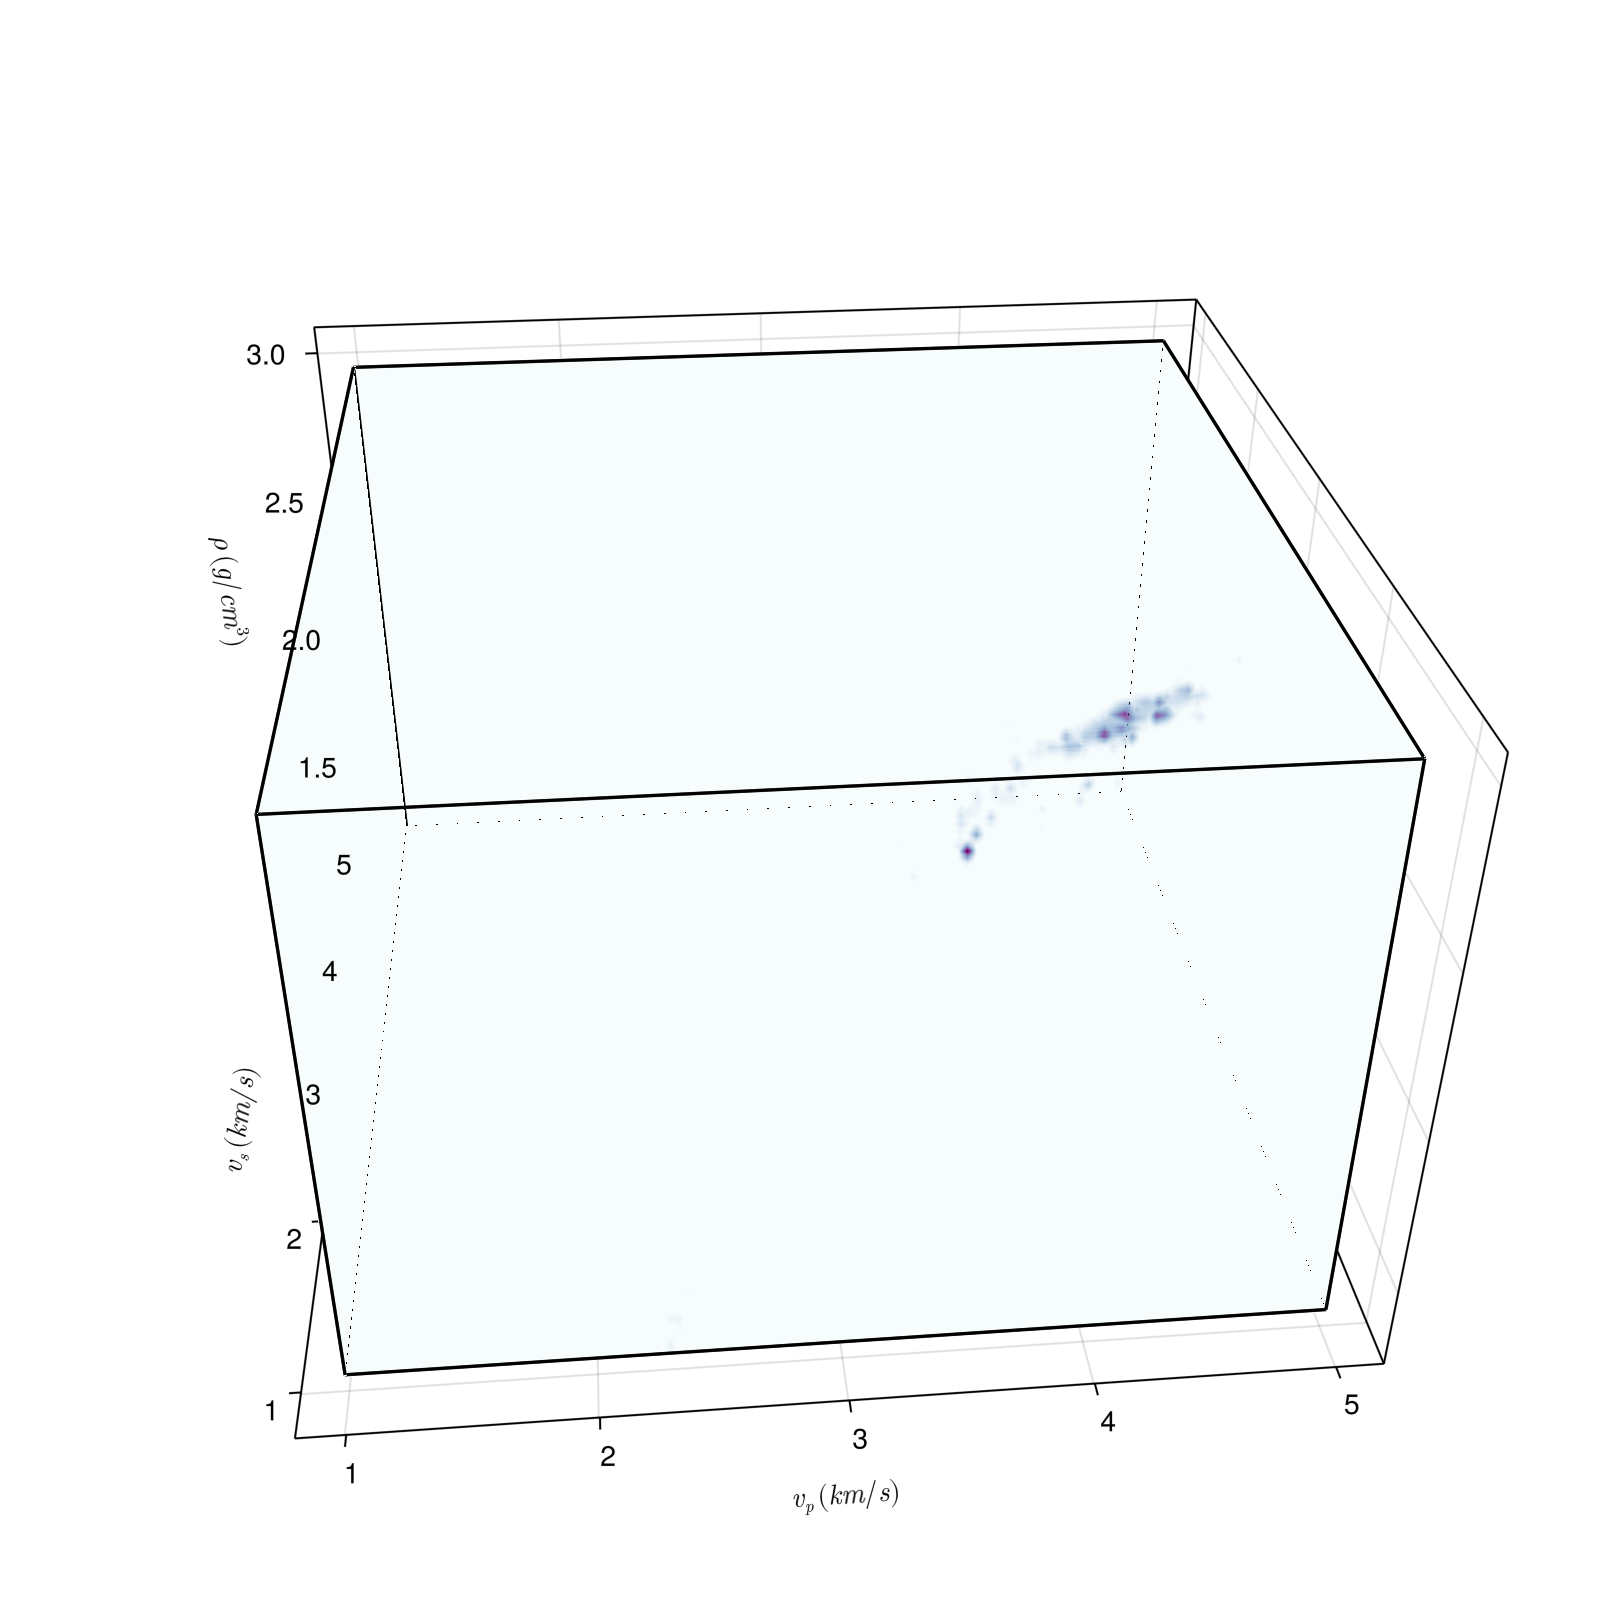

In [8]:
# GLMakie.activate!() # Activate the backend just for plotting
GLMakie.activate!(inline=true) #α
# Set the data for x, y, z, and the volume data
x = x_edges
y = y_edges
z = z_edges
vol = counts

# Create the figure and axis for the volume plot
fig = Figure(size = (800, 800))
ax = Axis3(fig[1, 1], perspectiveness = 0.5, azimuth = 17.19, elevation = 0.57)

# Plot the volume data
volume!(ax, x, y, z, vol, colormap = :BuPu, colorrange = (minimum(vol), maximum(vol)))

# Add labels for the axes: vp, vs, and rho
ax.xlabel = L"v_p \, (km/s)"
ax.ylabel = L"v_s \, (km/s)"
ax.zlabel = L"\rho \, (g/cm^3)"

# Define the minimum and maximum bounds for the data
x_min, x_max = minimum(x), maximum(x)
y_min, y_max = minimum(y), maximum(y)
z_min, z_max = minimum(z), maximum(z)

# Create a HyperRectangle using Vec for the origin and size
origin = Vec3f0(x_min, y_min, z_min)
size = Vec3f0(x_max - x_min, y_max - y_min, z_max - z_min)
box = GeometryBasics.HyperRectangle(origin, size)

# Draw the wireframe around the data range
wireframe!(ax, box, color=:black)

# Display the figure
# fig
current_figure()

The relation between 2D PDF and 3D PDF: 

A 2D histogram shows the distribution of two input variables using a grid of bins, where each bin counts how many data points fall within specific ranges of those two variables. A 3D histogram extends this concept to three input variables, creating a volumetric grid of bins that captures how data points are distributed across all three variables.

When you project a 3D histogram onto a plane, you somehow reduce it to a 2D histogram by collapsing one variable, thus showing the distribution of the remaining two variables. This projection helps visualize the relationships between pairs of variables within the 3D data.

My PDF is the histogram. It is PDF because:

- All values at different bins are greater or equal 0
- Integral or summation of the the value equal 1 (I did the normalization inside the histogram function)

## Problem 2

Based on the figure showing the relation between $v_P$ and $v_S$ in Borehole B, the predicted model is in the form of
$$
v_S = a + b v_P
$$

where the model parameters are given by the column vector $\mathbf{m} = [a, b]^T$.

The data vector is
$$
\mathbf{d} = [v_{S1}, v_{S2}, \dots, v_{Sn}]^T
$$

The operator matrix is
$$
\mathbf{G} =
\begin{bmatrix}
1 & v_{P1} \\
1 & v_{P2} \\
\vdots & \vdots \\
1 & v_{Pn}
\end{bmatrix}
$$

The relation linking the model and data pars:
$$
\mathbf{d} = \mathbf{G}\mathbf{m}
$$

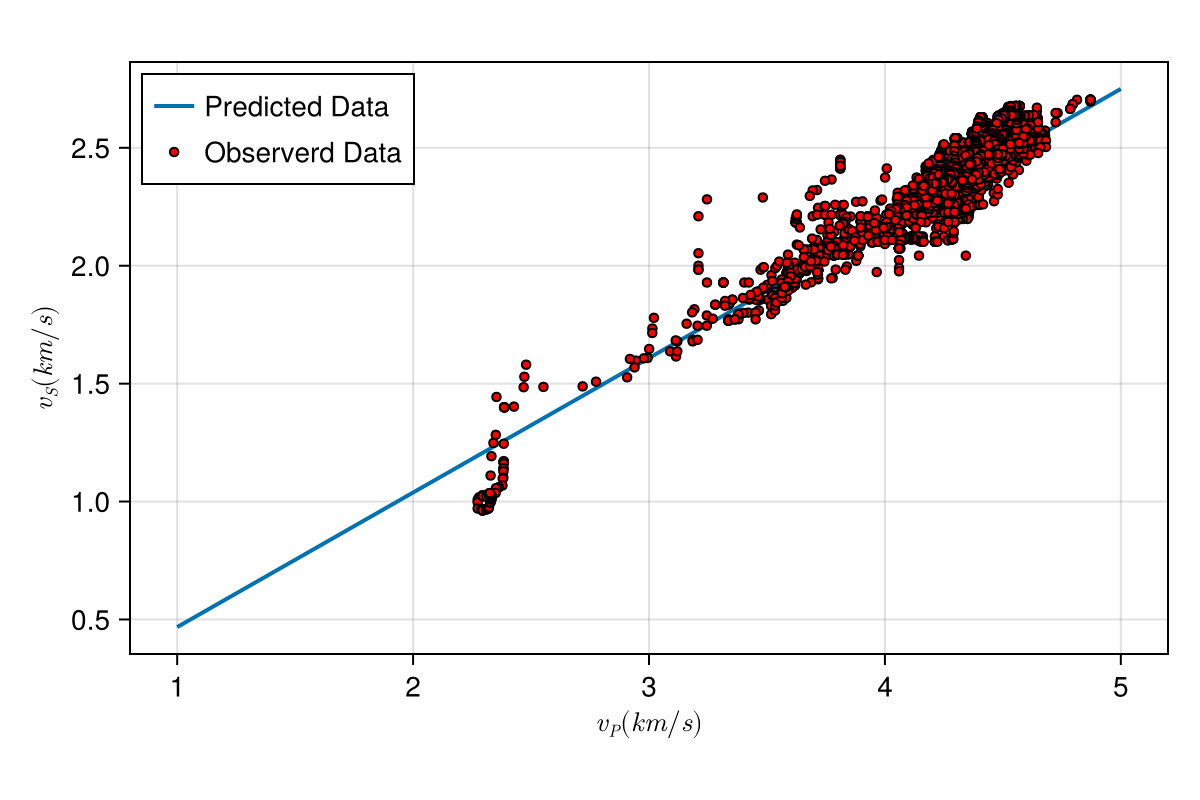

In [9]:
G = [ones(nA, 1) vpA] # Operator
d = vsA # Data
λ=0 # Regularization parameter
M = inv(G' * G + λ * I) * G' * d # Least Square
a = M[1]; b = M[2]; # Model PARAMS
tempx = 1:0.01:5
tempy = a .+ tempx .* b
CairoMakie.activate!(inline=true) #α

fig = Figure(size=(600, 400))


ax = Axis(fig[1,1], aspect=DataAspect(), xlabel=L"v_P (km/s)", ylabel=L"v_S (km/s)")
lines!(ax, tempx, tempy, linewidth=2., label="Predicted Data") # plot lines
scatter!(ax, vpB, vsB, markersize=6, color=:red, strokewidth=1, strokecolor=:black, label="Observerd Data")
axislegend(ax, position=:lt)
fig

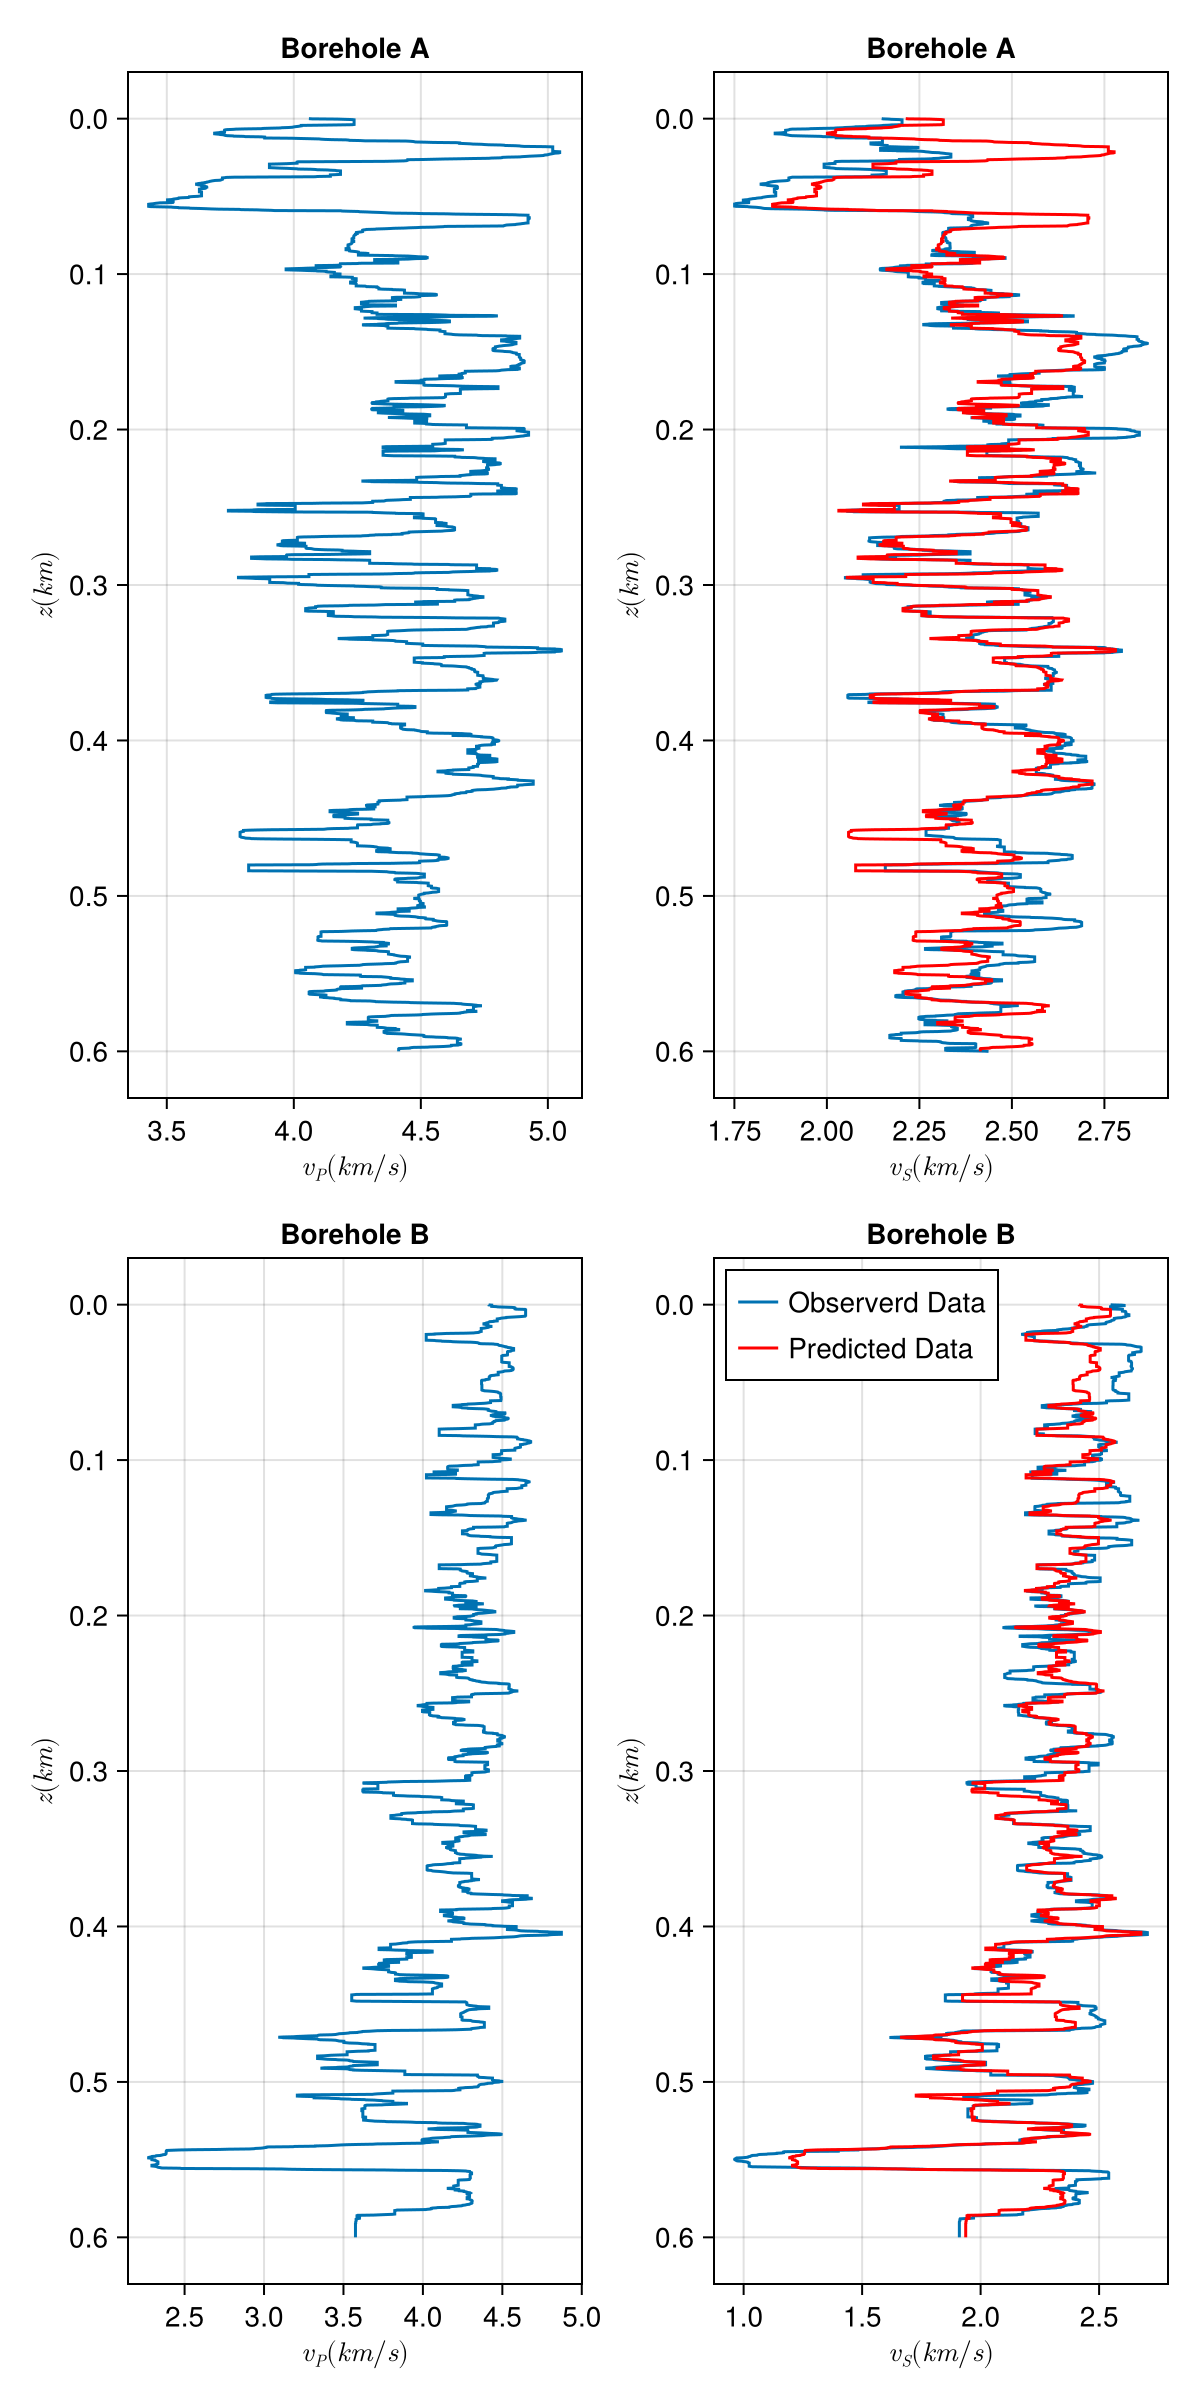

In [10]:

max_depth = 0.6

# Create the LinRange for z
zA = LinRange(0, max_depth, nA)
zB = LinRange(0, max_depth, nB)

# Create a figure and axis
CairoMakie.activate!()
fig = Figure(size=(600, 1200))
ax1 = Axis(fig[1, 1], xlabel=L"v_P (km/s)", ylabel=L"z (km)", title = "Borehole A")
ax2 = Axis(fig[1, 2], xlabel=L"v_S (km/s)", ylabel=L"z (km)", title = "Borehole A")
ax3 = Axis(fig[2, 1], xlabel=L"v_P (km/s)", ylabel=L"z (km)", title = "Borehole B")
ax4 = Axis(fig[2, 2], xlabel=L"v_S (km/s)", ylabel=L"z (km)", title = "Borehole B")


# Plot the data with lines
lines!(ax1, vpA, zA, label="Observerd Data") # observerd
lines1 = lines!(ax2, vsA, zA, label="Observerd Data") # observerd
lines2 = lines!(ax2, a .+ vpA * b, zA, color=:red, label="Predicted Data")  # predicted
lines3 = lines!(ax3, vpB, zB, label="Observerd Data") # observerd
lines!(ax4, vsB, zB, label="Observerd Data") # observerd
lines4 = lines!(ax4, a .+ vpB * b, zB, color=:red, label="Predicted Data")  # predicted

# Reverse the y-axis
ax1.yreversed = true
ax2.yreversed = true
ax3.yreversed = true
ax4.yreversed = true

axislegend(ax4, position=:lt)

fig

## Extra - Problem 3

In this problem, through observation, I identified that the relationship between $v_S$ and $\rho$ is nonlinear, while the relationship between $v_S$ and $v_P$ is linear. Based on this observation, I propose the following model:

$$
v_S = a + b \cdot v_P + c \cdot \rho + d \cdot \rho^2
$$

### Data Representation:
Let the measured $v_S$ values be represented as $[vS_1, vS_2, \dots, vS_n]^T$, a column vector of length $n$.

### Design Matrix:
The corresponding design matrix, $G$, which includes the linear and nonlinear terms for $v_P$ and $\rho$, is given by:

$$
G = \begin{bmatrix}
1 & v_{P1} & \rho_1 & \rho_1^2 \\
1 & v_{P2} & \rho_2 & \rho_2^2 \\
\vdots & \vdots & \vdots & \vdots \\
1 & v_{Pn} & \rho_n & \rho_n^2
\end{bmatrix}
$$

### Model Parameters:
The model parameters that we are solving for are $[a, b, c, d]^T$.


In [11]:
G = [ones(nA, 1) vpA rhoA rhoA.^2] # Operator
d = vsA # Data
λ=0 # Regularization parameter
M = inv(G' * G + λ * I) * G' * d # Least Square
a = M[1]; b = M[2]; c = M[3]; d = M[4]; # Model PARAMS

Plot the comparison between the real data and observed data

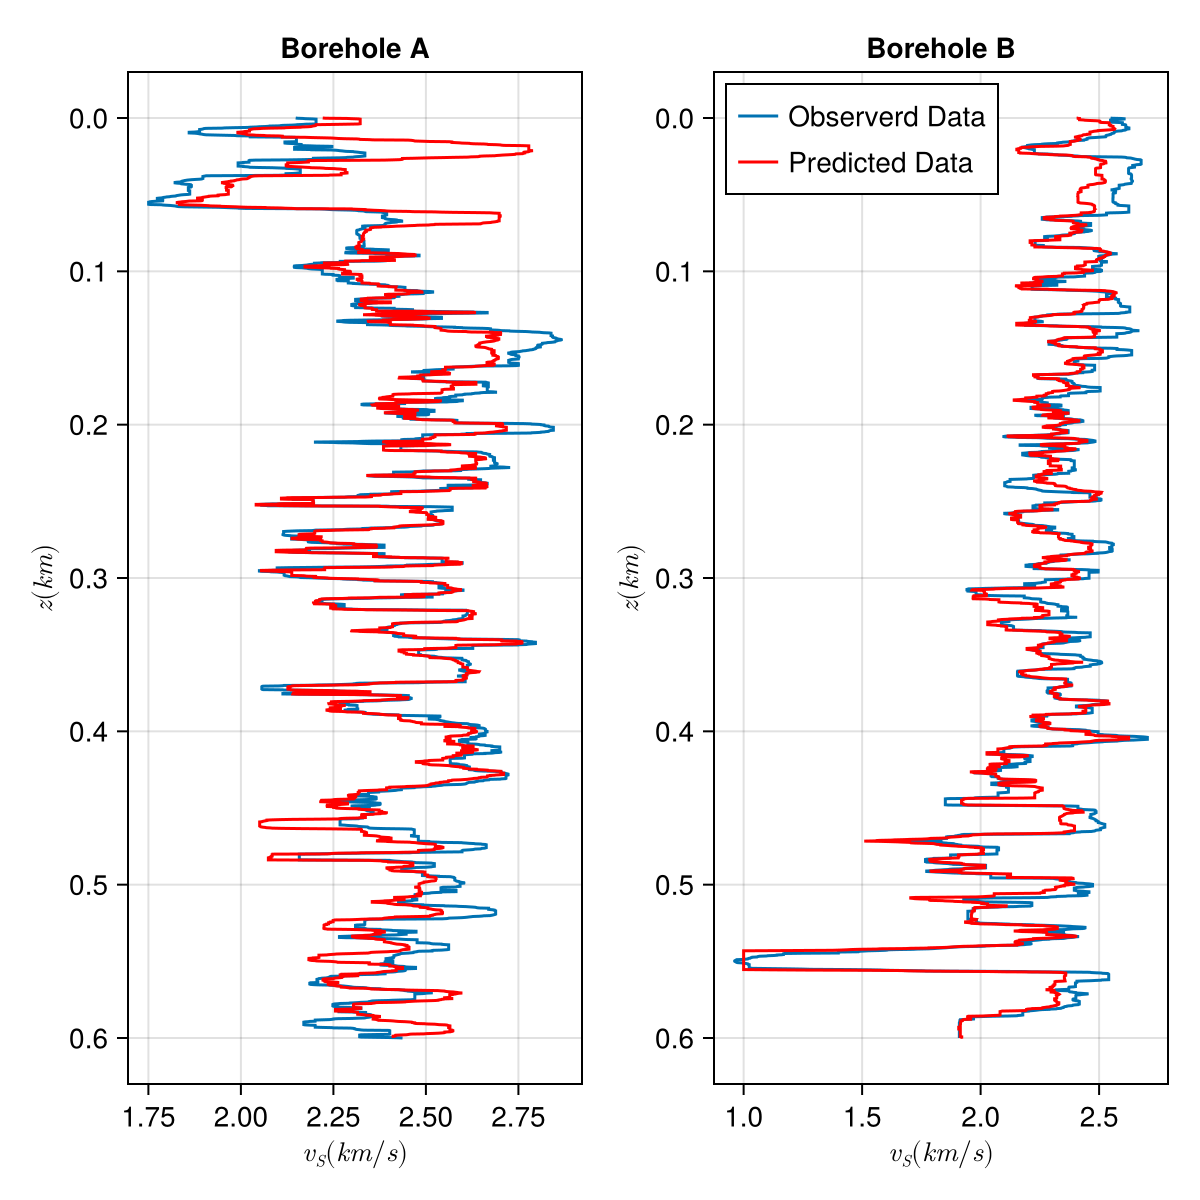

In [12]:
fig = Figure(size=(600, 600))
ax1 = Axis(fig[1, 1], xlabel=L"v_S (km/s)", ylabel=L"z (km)", title = "Borehole A")
ax2 = Axis(fig[1, 2], xlabel=L"v_S (km/s)", ylabel=L"z (km)", title = "Borehole B")

# Compute vs
vsA_Predicted = a .+ b.*vpA .+ c .* rhoA .+ d .*rhoA.^2
vsB_Predicted = a .+ b.*vpB .+ c .* rhoB .+ d .*rhoB.^2

v_min_threshold = 1. # add the resonable v_min_threshold for velocity
vsA_Predicted[vsA_Predicted .< v_min_threshold] .= v_min_threshold
vsB_Predicted[vsB_Predicted .< v_min_threshold] .= v_min_threshold


# Plot the data with lines
lines1 = lines!(ax1, vsA, zA) # observerd
lines2 = lines!(ax1, vsA_Predicted, zA, color=:red)  # predicted
lines!(ax2, vsB, zB, label="Observerd Data") # observerd
lines4 = lines!(ax2, vsB_Predicted, zB, color=:red, label="Predicted Data")  # predicted

# Reverse the y-axis
ax1.yreversed = true
ax2.yreversed = true
axislegend(ax2, position=:lt)


fig